__Author: Christian Camilo Urcuqui López__

__Date: 11 February 2019__

<img src="https://github.com/urcuqui/Data-Science/blob/master/Utilities/games.jpeg?raw=true" width="350">

# Artificial Intelligence and Games

Games allows us to make in the practice the algorithms in a environment that are similar to the real life. They are useful because we can use them in order to evaluate the algorithms versus human intelligence. 

We can find a lot of kinds of games, some of them have the next features:

+ These games have an adversary, in other words, two players with different interests.
+ We can find  games called sum zero, these kinds of games they are finished when a player win and another loose, or they were tied.  
+ They are informed, specifically, we know all the information about the game, for example, the movements of the opponent.
+ Each movement and movement are perfectly articulated, a random process is not applied. 

We can consider a game as a heuristic search, where the difference is in the adversary which we don't' know about its movements in a first instance (we need to search its possible movements). Some of the games are:
+ Tic-Tac-Toe
+ Chess
+ Checkers

<img src="https://cdncontribute.geeksforgeeks.org/wp-content/uploads/TIC_TAC.jpg" width="350">

_One approach is the application of the **mini max algorithm** that will allow the program to find the best way to face an adversary_

## Mini Max Algorithm

In this algorithm, **MAX** is referenced to the computer's round and **MIN** to the human's movement. MAX means the possibilities to win and MIN to the process to minimize the alternatives to the human wins.

__A terminal node__ is where some player wins or if the game finished in tie.

An **evaluation function** for this game is where we can assign +1 to the terminal nodes which allow the player to find the victory, -1 to the terminal nodes where the human adversary wins, and 0 where we can find a tie.

Minimax is an algorithm which uses DFS (_Depth First Search_) in order to reach a terminal node and when it is found the algorithm evaluates and assigns a value (+1, -1 or 0). Once the terminal node is marked with its value, the minimax algorithm will propagate these values to the father nodes.  

```
minimax function (player, board) : 
    if a node is terminal:
        return player
    children_nodes = all movements since the initial state
    if the movement is MAX:
        return the maximum value from minimax() to every child node
    else:
        return the minimum value from minimax() to every child node.
```

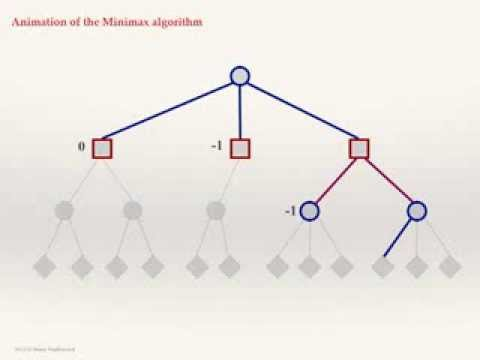

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('zDskcx8FStA')

In [ ]:
# %load tic-tac-toe.py
# tres en raya con algoritmo minimax

import sys
from operator import itemgetter

MAX = 1
MIN = -1

global jugada_maquina

# metodo de minmax para generar las distintas opciones y seleccionar la mejor jugada 
def minimax(tablero, jugador):
    global jugada_maquina
    
    # hay ganador o tablas? (nodo terminal)
    if game_over(tablero):
        return [ganador(tablero), 0]
    
    # generar las posibles jugadas
    movimientos = []
    for jugada in range(0, len(tablero)):
        # si faltan jugadas por realizar en la posición entonces...
        if tablero[jugada] == 0:
            # creamos un tablero copia auxiliar y le asignamos el valor dependiendo del tipo de jugador (humano/ordenador)
            tableroaux = tablero[:]
            tableroaux[jugada] = jugador
            # creamos las jugadas para el jugador adversario con el nuevo valor
            puntuacion = minimax(tableroaux, jugador * (-1))
            movimientos.append([puntuacion, jugada])
    
    # si el turno es del ordenador obtenemos el movimiento con el mayor valor y si es del humano obtenemos el de menor valor 
    if jugador == MAX:
        movimiento = max(movimientos, key=str)        
        jugada_maquina = movimiento[1]
        return movimiento 
    else:       
        movimiento = min(movimientos, key=str)        
        return movimiento[0]

def game_over(tablero):
    # hay tablas?
    no_tablas = False
    for i in range(0, len(tablero)):
        if tablero[i] == 0:
            no_tablas = True
            
    # hay ganador?
    if ganador(tablero) == 0 and no_tablas:
        return False
    else:
        return True

    
def ganador(tablero):
    # combinaciones de estados de ganadores
    lineas = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [0, 3, 6], [1, 4, 7], [2, 5,8], [0, 4, 8], [2, 4, 6]]
    ganador = 0
    for linea in lineas:
        if tablero[linea[0]] == tablero[linea[1]] and tablero[linea[0]] == tablero[linea[2]] and tablero[linea[0]] != 0:
            ganador = tablero[linea[0]]
    return ganador

# metodo que imprime el trablero de juego 
def ver_tablero(tablero):
    
    board = list(map(str, tablero))    
    for i in range(0, len(tablero)):
        if tablero[i] == MAX:
            board[i] = 'X'
        elif tablero[i] == MIN:
            board[i] = 'O'
        else:
            board[i] = ' '
  
    print('   |   |')
    print(' ' + board[0] + ' | ' + board[1] + ' | ' + board[2])
    print('   |   |')
    print('-----------')
    print('   |   |')
    print(' ' + board[3] + ' | ' + board[4] + ' | ' + board[5])
    print('   |   |')
    print('-----------')
    print('   |   |')
    print(' ' + board[6] + ' | ' + board[7] + ' | ' + board[8])
    print('   |   |')    

# metodo encargado de procesar el movimiento del jugador humano
def juega_humano(tablero):
    ok= False
    while not ok:
        casilla = input("Casilla?")
        # obtenemos la posición de la casilla de 1-9 y comparamos con su respectivo indice en la lista
        if str(casilla) in '0123456789' and len(str(casilla)) == 1 and tablero[int(casilla)-1] == 0:
            # asignamos a la casilla del jugador un valor de -1
            tablero[int(casilla)-1] = MIN
            ok = True
        if casilla == "exit":
            sys.exit(0)
    return tablero

# metodo del ordenador donde se aplica min-max con la propagación y selección de la mejor opción de la jugada teniendo la función de evaluación
def juega_ordenador(tablero):
    global jugada_maquina
    punt = minimax(tablero[:], MAX)
    tablero[jugada_maquina] = MAX
    return tablero

if __name__ == "__main__":
    print("Introduce casilla o exit para terminar")
    tablero = [0,0,0,0,0,0,0,0,0]
    
    while(True):
        ver_tablero(tablero)
        tablero = juega_humano(tablero)
        if game_over(tablero):
            break
        
        tablero = juega_ordenador(tablero)
        if game_over(tablero):
            break
            
    ver_tablero(tablero)
    g = ganador(tablero)
    if g == 0:
        gana = "Tablas"
    elif g == MIN:
        gana = "Jugador"
    else:
        gana = "Ordenador"
    
    print("Ganador: " + gana)

## Laboratorio

**Integrantes**

+ Nombre
+ Nombre

Proponga y explique una adaptación del juego donde se incluyan funciones de evaluación donde vea reflejado en el juego las dificultades:
+ fácil
+ normal
+ difícil

## References

+ https://www.inverse.com/article/31467-artificial-intelligence-computer-human-game
+ https://divertimentosinformaticos.blogspot.com/2011/06/la-maquina-invencible.html